In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys 
from pandas.tools.plotting import scatter_matrix
import scipy.stats as scs

sys.path.append('../')
import src.features.feature_cleaning as feature_cleaning

In [2]:
df, fieldofdegree_df, SOCP_labels, schl_labels, major_major, NAICSP_labels_df, MAJ_NAICSP_labels = feature_cleaning.load_dfs()

In [ ]:
MAJ_NAICSP_labels.info()

In [3]:
youngemp_df = feature_cleaning.clean_that_target(df, SOCP_labels)

../src/features/feature_cleaning.py:79: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  SOCPdf = df.dropna(axis='index', subset=['SOCP'])[df.SOCP != '999920']


Number of employed people: 218454
Percent employed people: 0.5785711448056677
Number of young employed people: 77406
Percent young employed people(out of all PUMS): 0.20500827650135733
Number of emp cats: 23


In [10]:
NAICSP_SOCP_df = feature_cleaning.create_NAICSP_SOCP_df(youngemp_df, NAICSP_labels_df, MAJ_NAICSP_labels)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77406 entries, 0 to 77405
Data columns (total 7 columns):
SERIALNO           77406 non-null int64
SOCP               77406 non-null object
MAJ_SOCP           77406 non-null object
MAJ_SOCP_labels    77406 non-null object
NAICSP             77406 non-null object
NAICSP_labels      77406 non-null object
MAJ_NAICSP         77406 non-null object
dtypes: int64(1), object(6)
memory usage: 32.7 MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 77406 entries, 0 to 77405
Data columns (total 7 columns):
SERIALNO           77406 non-null int64
SOCP               77406 non-null object
MAJ_SOCP           77406 non-null object
MAJ_SOCP_labels    77406 non-null object
NAICSP             77406 non-null object
NAICSP_labels      77406 non-null object
MAJ_NAICSP         77406 non-null object
dtypes: int64(1), object(6)
memory usage: 32.7 MB
None


In [11]:
NAICSP_SOCP_df.sample(20)

,SERIALNO,SOCP,MAJ_SOCP,MAJ_SOCP_labels,NAICSP,NAICSP_labels,MAJ_NAICSP,MAJ_NAICSP_labels,SERIALNO,SOCP,MAJ_SOCP,NAICSP,NAICSP_labels,MAJ_NAICSP,MAJ_SOCP__Architecture and Engineering,"MAJ_SOCP__Arts, Design, Entertainment, Sports, and Media",MAJ_SOCP__Building and Grounds Cleaning and Maintenance,MAJ_SOCP__Business and Financial Operations,MAJ_SOCP__Community and Social Service,MAJ_SOCP__Computer and Mathematical,MAJ_SOCP__Construction and Extraction,"MAJ_SOCP__Education, Training, and Library","MAJ_SOCP__Farming, Fishing, and Forestry",MAJ_SOCP__Food Preparation and Serving Related,MAJ_SOCP__Healthcare Practitioners and Technical,MAJ_SOCP__Healthcare Support,"MAJ_SOCP__Installation, Maintenance, and Repair",MAJ_SOCP__Legal,"MAJ_SOCP__Life, Physical, and Social Science",MAJ_SOCP__Management,MAJ_SOCP__Military Specific,MAJ_SOCP__Office and Administrative Support,MAJ_SOCP__Personal Care and Service,MAJ_SOCP__Production,MAJ_SOCP__Protective Service,MAJ_SOCP__Sales and Related,MAJ_SOCP__Transportation and Material Moving,MAJ_NAICSP__Accommodation and Food Services,MAJ_NAICSP__Administrative and Support and Waste Management and Remediation Services,"MAJ_NAICSP__Agriculture, Forestry, Fishing and Hunting","MAJ_NAICSP__Arts, Entertainment, and Recreation",MAJ_NAICSP__Construction,MAJ_NAICSP__Educational Services,MAJ_NAICSP__Finance and Insurance,MAJ_NAICSP__Health Care and Social Assistance,MAJ_NAICSP__Information,MAJ_NAICSP__Management of Companies and Enterprises,MAJ_NAICSP__Manufacturing,"MAJ_NAICSP__Mining, Quarrying, and Oil and Gas Extraction",MAJ_NAICSP__Other Services (except Public Administration),"MAJ_NAICSP__Professional, Scientific, and Technical Services",MAJ_NAICSP__Public Administration,MAJ_NAICSP__Real Estate and Rental and Leasing,MAJ_NAICSP__Retail Trade,MAJ_NAICSP__Transportation and Warehousing,MAJ_NAICSP__Utilities,MAJ_NAICSP__Wholesale Trade
60824,2017001164644,532031,53,Transportation and Material Moving,481,TRN-Air Transportation,48,Transportation and Warehousing,2017001164644,532031,53,481,TRN-Air Transportation,48,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
43433,2017000828989,2911XX,29,Healthcare Practitioners and Technical,6214,MED-Outpatient Care Centers,62,Health Care and Social Assistance,2017000828989,2911XX,29,6214,MED-Outpatient Care Centers,62,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
42920,2017000819043,119013,11,Management,111,AGR-Crop Production,11,"Agriculture, Forestry, Fishing and Hunting",2017000819043,119013,11,111,AGR-Crop Production,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
35737,2017000680216,274021,27,"Arts, Design, Entertainment, Sports, and Media",5419Z,"PRF-Other Professional, Scientific, And Techni...",54,"Professional, Scientific, and Technical Services",2017000680216,274021,27,5419Z,"PRF-Other Professional, Scientific, And Techni...",54,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
25270,2017000483047,372012,37,Building and Grounds Cleaning and Maintenance,5617Z,PRF-Services To Buildings And Dwellings (Excep...,56,Administrative and Support and Waste Managemen...,2017000483047,372012,37,5617Z,PRF-Services To Buildings And Dwellings (Excep...,56,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
25389,2017000485065,434171,43,Office and Administrative Support,62132,MED-Offices Of Optometrists,62,Health Care and Social Assistance,2017000485065,434171,43,62132,MED-Offices Of Optometrists,62,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
37977,2017000722444,472150,47,Construction and Extraction,23,"CON-Construction, (The Cleaning Of Buildings A...",23,Construction,2017000722444,472150,47,23,"CON-Construction, (The Cleaning Of Buildings A...",23,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
49580,20170009

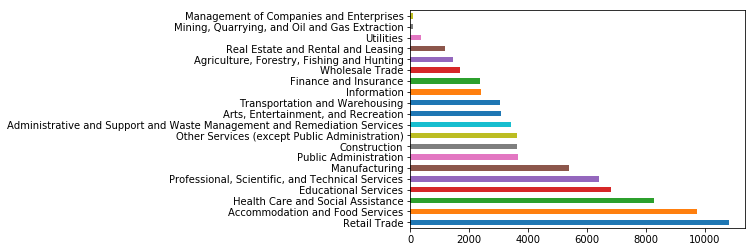

In [18]:
NAICSP_SOCP_df.MAJ_NAICSP_labels.value_counts().plot(kind='barh');

In [ ]:
fig, ax = plt.subplots()

In [15]:
X = NAICSP_SOCP_df.drop(axis=1, columns=['SERIALNO', 'SOCP', 'MAJ_SOCP', 'MAJ_SOCP_labels', 'NAICSP',	'NAICSP_labels',	'MAJ_NAICSP',	'MAJ_NAICSP_labels'])
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77406 entries, 0 to 77405
Data columns (total 43 columns):
MAJ_SOCP__Architecture and Engineering                                                  77406 non-null uint8
MAJ_SOCP__Arts, Design, Entertainment, Sports, and Media                                77406 non-null uint8
MAJ_SOCP__Building and Grounds Cleaning and Maintenance                                 77406 non-null uint8
MAJ_SOCP__Business and Financial Operations                                             77406 non-null uint8
MAJ_SOCP__Community and Social Service                                                  77406 non-null uint8
MAJ_SOCP__Computer and Mathematical                                                     77406 non-null uint8
MAJ_SOCP__Construction and Extraction                                                   77406 non-null uint8
MAJ_SOCP__Education, Training, and Library                                              77406 non-null uint8
MAJ_SOCP__Farming, 

In [16]:
X.head()

,MAJ_SOCP__Architecture and Engineering,"MAJ_SOCP__Arts, Design, Entertainment, Sports, and Media",MAJ_SOCP__Building and Grounds Cleaning and Maintenance,MAJ_SOCP__Business and Financial Operations,MAJ_SOCP__Community and Social Service,MAJ_SOCP__Computer and Mathematical,MAJ_SOCP__Construction and Extraction,"MAJ_SOCP__Education, Training, and Library","MAJ_SOCP__Farming, Fishing, and Forestry",MAJ_SOCP__Food Preparation and Serving Related,MAJ_SOCP__Healthcare Practitioners and Technical,MAJ_SOCP__Healthcare Support,"MAJ_SOCP__Installation, Maintenance, and Repair",MAJ_SOCP__Legal,"MAJ_SOCP__Life, Physical, and Social Science",MAJ_SOCP__Management,MAJ_SOCP__Military Specific,MAJ_SOCP__Office and Administrative Support,MAJ_SOCP__Personal Care and Service,MAJ_SOCP__Production,MAJ_SOCP__Protective Service,MAJ_SOCP__Sales and Related,MAJ_SOCP__Transportation and Material Moving,MAJ_NAICSP__Accommodation and Food Services,MAJ_NAICSP__Administrative and Support and Waste Management and Remediation Services,"MAJ_NAICSP__Agriculture, Forestry, Fishing and Hunting","MAJ_NAICSP__Arts, Entertainment, and Recreation",MAJ_NAICSP__Construction,MAJ_NAICSP__Educational Services,MAJ_NAICSP__Finance and Insurance,MAJ_NAICSP__Health Care and Social Assistance,MAJ_NAICSP__Information,MAJ_NAICSP__Management of Companies and Enterprises,MAJ_NAICSP__Manufacturing,"MAJ_NAICSP__Mining, Quarrying, and Oil and Gas Extraction",MAJ_NAICSP__Other Services (except Public Administration),"MAJ_NAICSP__Professional, Scientific, and Technical Services",MAJ_NAICSP__Public Administration,MAJ_NAICSP__Real Estate and Rental and Leasing,MAJ_NAICSP__Retail Trade,MAJ_NAICSP__Transportation and Warehousing,MAJ_NAICSP__Utilities,MAJ_NAICSP__Wholesale Trade
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [17]:
X_train, X_test = train_test_split(X, test_size=0.30, random_state=22)

NameError: name 'train_test_split' is not defined